#### Data Import 

In [16]:
# Imports
import pandas as pd
import warnings
from helpers import * 

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    # Import entities / skills / wikipedia
    entities = pd.read_csv("../data/classeek_entities.csv")
    skills = pd.read_csv("../data/classeek_skills.csv")
    alt_names = pd.read_csv("../data/classeek_alternative_names.csv")
    performances = pd.read_csv("../data/classeek_performances.csv")
    pieces = pd.read_csv("../data/classeek_pieces.csv")
    wikipedia_pv = pd.read_csv("../data/classeek_wikipedia_page_views.csv")
    mediamentions = pd.read_csv("../data/classeek_media_mentions.csv")
    biographies = pd.read_csv("../data/classeek_biographies.csv")

    entities_performances = pd.read_csv("../data/classeek_entities_performances.csv")
    entities_pieces = pd.read_csv("../data/classeek_entities_pieces.csv")
    entities_skills = pd.read_csv("../data/classeek_entity_skills.csv")

# 
# Gauthier Capuçon 
#### Entity ID : '149b70fa-a190-4a83-bea9-38dafc1d4c5c'

In [2]:
entity_id = '149b70fa-a190-4a83-bea9-38dafc1d4c5c'

## 0 - Basic Informations 

In [3]:
# Basic information about the entity 
entity_info = get_info(entity_id, entities, entities_performances, entities_pieces, entities_skills, mediamentions, 
             wikipedia_pv, biographies, alt_names, include_lists = True)
infos = ['id', 'name', 'gender', 'alive', 'birth_date', 'death_date', 'current_influence_percentile']
entity_info.iloc[:, 0:7]

,id,name,gender,alive,birth_date,death_date,current_influence_percentile
758,149b70fa-a190-4a83-bea9-38dafc1d4c5c,Gautier Capuçon,NaN,True,NaN,NaN,99.0


In [4]:
# Number of cells in other tables linked to that entity 
entity_info.iloc[:, 7:13]

,nb_perf,nb_pieces,nb_media_mentions,nb_skills,nb_alt_names,nb_biographies
758,289,435,257,2,8,24


## 1 - Performances 

In [17]:
# Extract performances 
df_perfs = performances[performances.id.apply(lambda x : x in entity_info.perf_list.to_list()[0])].loc[:, ['date', 'venue', 'country', 'city', 'title', 'key', 'continent']]
df_perfs

,date,venue,country,city,title,key,continent
139,2020-07-17 19:00:00.000000,- CONCERT CANCELLED,Switzerland,NaN,VERBIERFESTIVALORCHESTRA_VALERYGERGIEV_LEONIDA...,NaN,Europe
146,2020-07-20 11:00:00.000000,- CONCERT CANCELLED,Switzerland,NaN,GAUTIERCAPU_ON_YUJAWANG_20_July_2020__11_00___...,NaN,Europe
222,2020-07-21 20:00:00.000000,- CONCERT CANCELLED,Switzerland,NaN,DANIELLOZAKOVICH_GAUTIERCAPU_ON_MARTINFR_ST_YU...,NaN,Europe
1237,2016-01-22 20:30:00.000000,Salle des concerts - Cité de la musique,France,NaN,Hommage à Henri Dutilleux,NaN,Europe
1272,2017-10-24 20:30:00.000000,Grande salle Pierre Boulez - Philharmonie,France,NaN,Gewandhausorchester Leipzig / Blomstedt,NaN,Europe
...,...,...,...,...,...,...,...
116801,2015-01-09 00:00:00.000000,Boston Symphony Orchestra,United States,NaN,"Boston Symphony Orchestra concert program, Sub...",NaN,North America
116802,2015-01-10 00:00:00.000000,Boston Symphony Orchestra,United States,NaN,"Boston Symphony Orchestra concert program, Sub...",NaN,North America
118181,2020-09-27 11:30:00.000000,Wigmore Hall,United Kingdom,London,Wigmore Hall/Cancelled: Gautier Capuçon cello;...,NaN,Europe
118687,2021-09-03 19:00:00.000000,Wolkenturm,nil,Grafenegg,Valery gergiev and the munich philharmonic i,nil,NaN


## 2 - Pieces 

In [6]:
df_pieces = pieces[pieces.id.apply(lambda x : x in entity_info.pieces_list.to_list()[0])]
df_pieces.loc[:, ['composer', 'title', 'source']].head(10)

,composer,title,source
432,Franz Schubert (1797-1828),"String Quintet in C major, D. 956",3
433,Felix Mendelssohn (1809-1847),"Octet in E-flat major, Op. 20",3
591,Igor Stravinski,Petrouchka,7
751,Vittorio Monti,Csárdás,7
853,Arias by,"Rossini, Mozart, Christiné, Messager, Lehar, O...",3
854,Johannes Brahms (1833-1897),"Piano Quartet in G minor, Op. 25",3
887,Henri Dutilleux,Métaboles,7
895,Hector Berlioz,Symphonie fantastique,7
899,Claude Debussy,Sonate pour violon et piano,7
910,Piotr Ilitch Tchaïkovski,Symphonie n° 4,7


## 3 - Media mentions 

In [7]:
df_medias = mediamentions[mediamentions.id.apply(lambda x : x in entity_info.media_mentions.to_list()[0])]
df_medias.loc[:, ['comparable_text', 'url', 'header_text']].head(10)

,comparable_text,url,header_text
6724,How To Spend ItSchloss Elmau: the German castl...,https://www.ft.com/content/917754e6-9a3e-4bbd-...,Schloss Elmau: the German castle of high cultu...
6725,ReviewAlbumsSchumann: Works for cello....\n\t\...,https://www.ft.com/content/87dc691c-1d72-11e9-...,Schumann: Works for cello
6726,"ReviewMusicLisa Batiashvili, Gautier Capuçon a...",https://www.ft.com/content/692cf10a-e733-11e8-...,"Lisa Batiashvili, Gautier Capuçon and Jean-Yve..."
6727,ReviewMusicGewandhausorchester Leipzig/Blomste...,https://www.ft.com/content/700dba36-b8a4-11e7-...,"Gewandhausorchester Leipzig/Blomstedt, Barbica..."
6728,ReviewAlbumsLutoslawski: Cello Concerto and Sy...,https://www.ft.com/content/84e3fbb2-e2d7-11e6-...,Lutoslawski: Cello Concerto and Symphony No. 4
6729,ReviewArtsSchubert: String Quintet...made tang...,https://www.ft.com/content/ccf002bc-05cd-11e6-...,Schubert: String Quintet
6730,"ReviewAlbumsBeethoven, Mozart, et al: Live fro...",https://www.ft.com/content/5653638e-07f3-11e5-...,"Beethoven, Mozart, et al: Live from Lugano 2014"
6731,ReviewAndrew ClarkFauré: Complete Chamber Musi...,https://www.ft.com/content/adf4ffea-e280-11e0-...,Fauré: Complete Chamber Music for Strings and ...
6732,"Life & ArtsProgetto Martha Argerich, Auditorio...",https://www.ft.com/content/6357f69a-9d8e-11e0-...,"Progetto Martha Argerich, Auditorio RSI, Lugano"
6733,"ReviewAndrew ClarkChopin: Various works, Marth...",https://www.ft.com/content/1abcec70-3bc8-11df-...,"Chopin: Various works, Martha Argerich and Fri..."


In [8]:
# One example of media mention
df_medias.iloc[2].comparable_text

'ReviewMusicLisa Batiashvili, Gautier Capuçon and Jean-Yves Thibaudet perform with energy and delicacy at the Barbican...With 11 European cities in virtually as many days, it would have been forgivable if violinist Lisa Batiashvili, cellist Gautier Capuçon and pianist Jean-Yves Thibaudet had been flagging by the time...November 13, 2018'

## 4 - Wikipedia Page Views 

In [9]:
df_wiki = wikipedia_pv[wikipedia_pv.id.apply(lambda x : x in entity_info.wiki_pv.to_list()[0])]
df_wiki.loc[:, ['en', 'fr', 'de', 'it', 'ru', 'period_start_date']].head(5)

,en,fr,de,it,ru,period_start_date
11289,1588.0,6332.0,360.0,72.0,NaN,2015-10-01
11290,1431.0,1807.0,278.0,94.0,NaN,2015-11-01
11291,1597.0,15934.0,379.0,112.0,NaN,2015-12-01
11292,1569.0,5491.0,491.0,110.0,NaN,2016-01-01
11293,1624.0,9980.0,325.0,94.0,NaN,2016-02-01


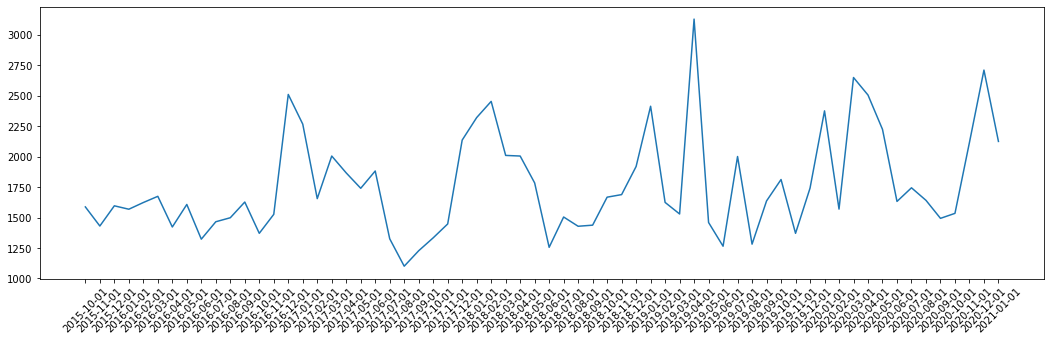

In [10]:
import matplotlib.pyplot as plt
x = df_wiki.period_start_date.to_list()
y = df_wiki.en.to_list()
plt.figure(figsize=[18, 5])
plt.xticks(rotation=45)
plt.plot(x, y)

## 5 - Skills 

In [11]:
df_skills = skills[skills.id.apply(lambda x : x in entity_info.skills_list.to_list()[0])]
df_skills.loc[:, ['name']]

,name
3,Conductor
68,Cellist


## 6 - Alternative Names 

Alternative names are the names used by developpers to map down several entities to one during scraping operations. They are not related to the aliases found with fuzzy string matching during cleaning. 

In [12]:
entity_info.alter_names.to_list()

[['gautier capuçon',
  'gautier capucon',
  'gauthier capucon',
  'gauthier capuçon',
  'capuçon gautier',
  'gautier capuçon, conducting, cello',
  'gautier capuçon, cello',
  'Gautier Capuçon']]

## 7 - Biographies 

In [13]:
df_bios = biographies[biographies.id.apply(lambda x : x in entity_info.bios_list.to_list()[0])]
df_bios.loc[:, ['detail', 'year', 'source']].sample(10)

,detail,year,source
57039,Gautier Capuçon is a true 21st century ambassa...,2019,1
23713,Gautier Capuçon is a true 21st century ambassa...,2019,1
55618,Gautier Capuçon is a true 21st century ambassa...,2019,12
46237,Gautier Capuçon is a true 21st century ambassa...,2018,1
59199,Gautier Capuçon is a true 21st century ambassa...,2019,1
26945,Gautier Capuçon is a true 21st century ambassa...,2020,1
56310,Gautier Capuçon is a true 21st century ambassa...,2019,1
56694,Gautier Capuçon Cello Cello Gautier Capuçon is...,2020,27
35923,"Gautier Capuçon, né en 1981 à Chambéry, commen...",2018,17
20042,Gautier Capuçon est un véritable ambassadeur d...,2019,35


In [14]:
# One bography example 
df_bios.iloc[0].detail

'“It’s the rare performer who can bring such ease and refinement to this music, while still giving everything he plays a sense of dramatic urgency.” (San Francisco Chronicle)\r\nGautier Capuçon is a true 21st century ambassador for the cello. Performing each season with many of the world’s foremost conductors and instrumentalists, he is also founder and leader of the ‘Classe d’Excellence de Violoncelle’ at the Fondation Louis Vuitton in Paris – based in the stunning new Auditorium designed by Frank Gehry. He is acclaimed internationally for his deeply expressive musicianship and exuberant virtuosity, as well as for the glorious sonority of his 1701 Matteo Goffriller cello.  \r\nDuring 2016/17 he returns to such orchestras as the London Symphony and Philharmonia orchestras, Berliner Philharmoniker, Russian National Orchestra, Staatskapelle Dresden, Münchner Philharmoniker, Chicago Symphony Orchestra, Los Angeles Philharmonic and San Francisco Symphony – and is being reinvited for concer